# Small-World Networks

## Introduction

This worksheet explores the formation of networks that result in the "small world" phenomenon. A popular example of the small world phenomenon is the network formed by actors appearing in the same movie (e.g., "Six Degrees of Kevin Bacon"), but small worlds are not limited to people-only networks. Other examples range from power grids to the neural networks of worms. This model illustrates some general, theoretical conditions under which small world networks between people or things might occur.

This model is an adaptation of the Watts-Strogatz model proposed by Duncan Watts and Steve Strogatz {cite}`watts1998collective`, whose definition of small-worldness stipulates significant local clustering as well as small path lengths. It begins with a *ring lattice* network where each node is connected to $k$ neighbours on either side. Using this as a starting point, we then modify the network by rewiring edges – removing an edge from the graph and replacing it with an edge between two nodes sampled at random. Over time, we analyse the effect this rewiring has the on various connections between nodes and on the properties of the network. Watts and Strogatz realised that by 'rewiring' a small number of edges in a lattice graph, the average path length decreases sharply, but clustering coefficients remain high. This property of short path distances and high clustering characterises a 'small world' graph.

```{image} watts_strogatz.png
:alt: L(12, 2)
:width: 400px
:align: center
```

```{note}
This worksheets sets out a structured way to reproduce the results similar to Watts and Strogatz (1998). You are encouraged experiment and deviate from this worksheet in any way you see fit.
```

## Questions

We will use Python and NetworkX to perform the simulation. To start, we need the definition of a *ring lattice*.

```{admonition} Definition: Ring Lattice

A **ring lattice** $L_{N,k}$ is a graph consisting of $N$ nodes arranged in a ring such that each node is
connected to each of its $k$ closest neighbours on either side.

Below is $L(12, 2)$:

```{image} ring_lattice.jfif
:alt: L(12, 2)
:width: 150px
:align: center
```

We will also need to import the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
np.random.seed(3)

### Question 1

*Answer this by hand*.

Calculate the global clustering coefficient and *approximate* shortest path length of $L(N, k)$.


### Question 2
Write a function `get_lattice(N, k)` which returns an undirected ring lattice $L_{N,k}$ with $N$ nodes each connected to its $k$ closest neighbours.

In [3]:
def get_lattice(N, k):
    G = nx.Graph()
    edgelist = [((i+j) % N, i) for i in range(N) for j in range(1, k+1)]
    G.add_edges_from(edgelist)
    return G

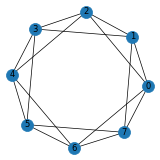

In [4]:
G = get_lattice(8, 2)
plt.figure(figsize=(3,3), dpi=25)
nx.draw(G, with_labels=True)

### Question 3

Write a function `rewire_edge(G, i, j)` which randomly rewires the start and end nodes of the edge connected nodes `i` and `j` of graph `G`. The function should remove the edge connecting nodes `i` and `j` then add a new edge connecting a *distinct* pair of random nodes.

In [5]:
def rewire_edge(G, i, j):
    u, v = np.random.choice(G.number_of_nodes(), 2, replace=False)
    G.remove_edge(i, j)
    G.add_edge(u, v)

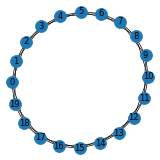

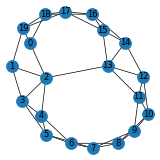

In [6]:
G = get_lattice(20, 2)
plt.figure(figsize=(3,3), dpi=25)
nx.draw(G, with_labels=True)

rewire_edge(G, 0, 1)
plt.figure(figsize=(3,3), dpi=25)
nx.draw(G, with_labels=True)

### Question 4

Write a function `rewire_graph(G, p)` which loops over all edges of graph `G`, rewiring each one with probability `p`.

In [7]:
def rewire_graph(G, p):
    for i,j in G.edges:
        if np.random.binomial(1, p):
            rewire_edge(G, i, j)

### Question 5

Choosing suitable values for `N` and `k`, write a script that generates a ring lattice graph, rewires the graph with given rewiring probability `p`, then calculates the average path length and global clustering coefficient. Amend your code so that `p` varies from `0` to `1`, and create arrays to store the average path length and global clustering coefficient for each value of `p`.

### Question 6

Create a figure which shows how average path length and global clustering co-efficient vary with rewiring probability. Experiment with different values of `N` and `k`. For what values of `p` does the resulting graph have small-world properties? Can you reproduce Figure 2 in {cite}`watts1998collective`?

### Question 7 [Open-ended]

How did Watts and Strogatz determine the small-worldness of the graph of the *C-Elegans* nervous system?

Import the graph of the *C Elegans* nervous system into Python and see if you can reproduce the values in Table 1 of {cite}`watts1998collective`.

<a href="herm_full_edgelist.csv" download>Download C Elegans Nervous System Data</a>  

## References

```{bibliography}
```